# Importing The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we have use specific libraries such as numpy and pandas in order to import the data and perfom several calculations on the data using numpy

# Importing The Datasets


In [4]:
X_train = pd.read_csv("train_images.csv",header = None)
Y_labels = pd.read_csv("train_labels.csv")
X_test = pd.read_csv("test_images.csv",header = None)
Y_test_labels = pd.read_csv("test_labels.csv")
Y_test = Y_test_labels['Volcano?']
Y_train = Y_labels['Volcano?']
X_train = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([Y_train,Y_test], axis=0)
X_train = np.array(X_train)
Y = np.array(Y)

    

We have imported the dataset from the kaggle website <br>
Link - https://www.kaggle.com/datasets/fmena14/volcanoesvenus

# Knowing The Dataset
 

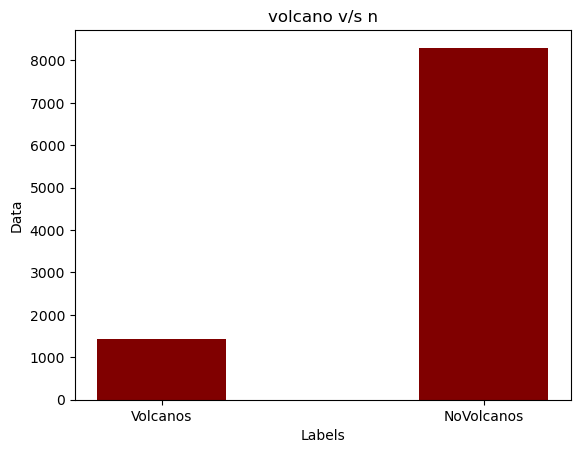

In [8]:
c1=0
c0=0
for i in range(0,len(Y)):
    if Y[i]==1:
        c1=c1+1
    else:
        c0=c0+1
data = {'Volcanos':c1,'NoVolcanos':c0}
label = list(data.keys())
values = list(data.values())
plt.bar(label, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("Data")
plt.title("volcano v/s n")
plt.show()

# Implementing Min-Max Normalization 

As we know that the dataset has lot of values and larger numbers might create problem in plotting the data as well our database will be structured and arranged in a way that is logical, with increased organization, duplication and location errors will be minimized.

In [9]:
def normalize(X_train):
    h = X_train.T
    maxi = []
    mini = []
    for i in range(0,len(h)):
        maxi.append(np.amax(h[i]))
        mini.append(np.amin(h[i]))
    d = []
    for i in range(0,len(h)):
        upp = h[i]-mini[i]
        lower = maxi[i]-mini[i]
        v = upp/lower
        d.append(v)
    d = np.array(d)
    d=d.T
    return d
    

Above here we have perfom Min-Max Normalization on the given dataset on both the training dataset as well as test dataset <br>
<b>Formula for Min-Max Normalization : </b><br>
<b> X = (X - X<sub>min</sub>)/(X<sub>max</sub>-X<sub>min</sub>)

# Implementing PCA

In [11]:
def PCA(X_train):
    X_mean = np.mean(X_train,axis=0)
    Xm = X_train - X_mean
    Q = np.dot(Xm.T,Xm)
    Q = Q/len(Xm-1)
    e_value,e_vectors = np.linalg.eig(Q)
    return e_value , e_vectors

def Transform(e_value,k,e_vectors,X_train):
    X_mean = np.mean(X_train,axis=0)
    Xm = X_train - X_mean
    index = np.argsort(e_value)[::-1]
    x = np.arange(0,k,1,dtype=int) 
    vectors = e_vectors.T
    vectors = vectors[index[x]]
    vectors = vectors.T
    X_transform = np.dot(Xm,vectors)
    return X_transform

As we can see above we have implemented<b> PCA </b>by using <b>Eigen Value Decomposition Method (EVD)</b> 
<ul>
    <b>Steps</b>
    <li>Find the mean X_mean </li>
    <li>Substract from original i.e <b>Xm = X - X_mean</b>
    <li>Now we find the covariance i.e <b>Dot_product(Xm,Xm.T)/(len(Xm-1)</b>
    <li>Now we find the eigenvectors and eigenvalues with help of linalg function</li>
</ul>
After this we plot the variance dispersion and the components v/s eigen graph so that we can know how many components to take and after it we transform the given the data into the selected components <br>

Transformation procedure is done with help of eigen values and eigen vectors
<ul>
    <b>Steps</b>
    <li>Find Mean X_mean </li>
    <li>Substract from original i.e <b>Xm = X - X_mean</b>
    <li>We sort the eigen values in descending order</li>
    <li>We take only the first selected K component corresponding eigenvectors</li>
    <li><b>Dot_product(Xm,vectors.T)</b></li>
        </ul>
    
    

# Implementing KNN

In [12]:
def predict_knn(X_train_df,X_test_df,Y_train,k):
    dist_index = []
    for i in range(0,len(X_test_df)):
        diff = X_train_df - X_test_df[i]
        diff = np.square(diff)
        diff = np.sum(diff,axis=1)
        diff = np.sqrt(diff)
        index = np.argsort(diff)
        dist_index.append(index)
    labels_dist = []
    for i in range(0,len(dist_index)):
        cols = []
        for j in range(0,k):
            cols.append(Y_train[dist_index[i][j]])
        labels_dist.append(cols)

    predict = []
    for i in range(0,len(labels_dist)):
        v = np.bincount(labels_dist[i]).argmax()
        predict.append(v)
    return predict

def cm(predict,Y_test):
    ap = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range(0,len(predict)):
        if Y_test[i]==1 and predict[i]==1:
            ap = ap+1
        elif Y_test[i]==0 and predict[i]==1:
            fp = fp+1
        elif Y_test[i]==1 and predict[i]==0:
            fn = fn + 1
        elif Y_test[i]==0 and predict[i]==0:
            tn = tn + 1
    row1 = [ap , fp]
    row2 = [fn , tn]
    rows = []
    rows.append(row1)
    rows.append(row2)
    return rows

def accuracy(cm):
    f = 2*cm[0][0]
    d = 2*cm[0][0]
    d = d+cm[0][1]
    d = d+cm[1][0]
    f = f/d  
    acc = cm[0][0]+cm[1][1]
    dv = np.sum(cm)
    acc = acc/dv
    return f,acc

Above we have implemented the KNN model using eucledian distance and then finding the nearest index and label it to the given test data in order to predict the classification of the given particular data

In [85]:
def splitting(X,Y,n):
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    for i in range(0,len(X)):
        if i >(len(X)-n-1):
            x_test.append(X[i])
            y_test.append(Y[i])
        else:
            x_train.append(X[i])
            y_train.append(Y[i])
    return x_train,x_test,y_train,y_test

We will now split the data back where it were original training dataset and test dataset

# Implementing Normalization On Given Dataset

In [15]:
X_N = normalize(X_train)

# Implementing PCA On The Given Dataset


In [16]:
%%time
e_train,e_v_train = PCA(X_N)

CPU times: user 44min 12s, sys: 16min 2s, total: 1h 15s
Wall time: 12min 40s


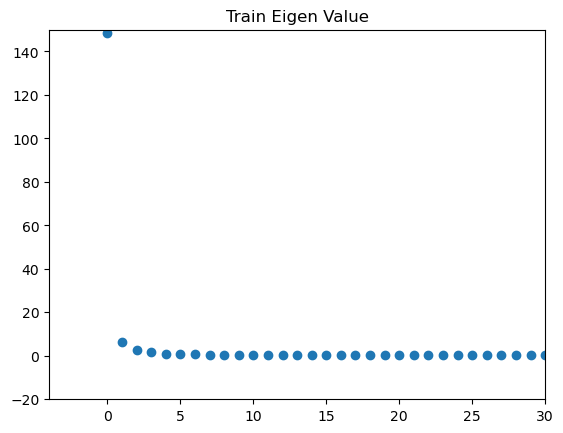

In [82]:
index = np.argsort(e_train)[::-1]
z = np.arange(0,len(index),1,dtype=int)
vt = e_train[index[z]]
plt.scatter(z,vt[z])
plt.xlim([-4,30])
plt.ylim([-20,150])
plt.title("Train Eigen Value")
plt.show()

/Users/shyampatel/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/shyampatel/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


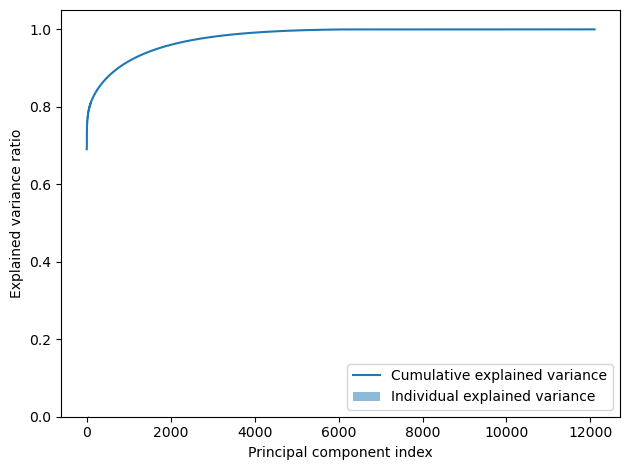

In [18]:
total_egnvalues = sum(e_train)
var_exp = [(i/total_egnvalues) for i in sorted(e_train, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Above we have use np.cumsum to find the cumulative variance in order to find number of components we can take for getting above certain variance

In [19]:
def n_components(cum_sum_exp,var):
    for i in range(0,len(cum_sum_exp)):
        if cum_sum_exp[i]>var:
            return i

# Experiment On Some Random Values Of PCA

Let us experiment on when our components covers different percent of variance

# For 3 Nearest Neighbors

In [91]:
%%time
for i in [0.65,0.70,0.75,0.80,0.85,0.90]:
    x = n_components(cum_sum_exp,i)
    X_transform = Transform(e_train,x,e_v_train,X_N)
    x_train,x_test,y_train,y_test = splitting(X_transform,Y,len(X_test))
    predict = predict_knn(x_train,x_test,y_train,3)
    conf_m = cm(predict,y_test)
    conf_m = np.array(conf_m)
    f , acc= accuracy(conf_m)
    print("The confusion Matrix For 3 Nearest Neighbours and "+str(x)+" components "+str(i)+" variance")
    print(conf_m)
    print("Accuracy for 3 Nearest Neighbours and "+str(x)+" components "+str(i)+" variance")
    print(acc*100)
    print("F-Score for 3 Nearest Neighbours and "+str(x)+" components "+str(i)+" variance")
    print(f)

The confusion Matrix For 3 Nearest Neighbours and 0 components 0.65 variance
[[   0    0]
 [ 434 2300]]
Accuracy for 3 Nearest Neighbours and 0 components 0.65 variance
84.12582297000732
F-Score for 3 Nearest Neighbours and 0 components 0.65 variance
0.0
The confusion Matrix For 3 Nearest Neighbours and 1 components 0.7 variance
[[  26  119]
 [ 408 2181]]
Accuracy for 3 Nearest Neighbours and 1 components 0.7 variance
80.72421360643746
F-Score for 3 Nearest Neighbours and 1 components 0.7 variance
0.08981001727115717
The confusion Matrix For 3 Nearest Neighbours and 6 components 0.75 variance
[[  89  107]
 [ 345 2193]]
Accuracy for 3 Nearest Neighbours and 6 components 0.75 variance
83.46744696415507
F-Score for 3 Nearest Neighbours and 6 components 0.75 variance
0.28253968253968254
The confusion Matrix For 3 Nearest Neighbours and 65 components 0.8 variance
[[ 131   44]
 [ 303 2256]]
Accuracy for 3 Nearest Neighbours and 65 components 0.8 variance
87.30797366495977
F-Score for 3 Neare

# For 5 Nearest Neighbors

In [92]:
%%time
for i in [0.65,0.70,0.75,0.80,0.85,0.90]:
    x = n_components(cum_sum_exp,i)
    X_transform = Transform(e_train,x,e_v_train,X_N)
    x_train,x_test,y_train,y_test = splitting(X_transform,Y,len(X_test))
    predict = predict_knn(x_train,x_test,y_train,5)
    conf_m = cm(predict,y_test)
    conf_m = np.array(conf_m)
    f , acc= accuracy(conf_m)
    print("The confusion Matrix For 5 Nearest Neighbours and "+str(x)+" components "+str(i)+" variance")
    print(conf_m)
    print("Accuracy for 5 Nearest Neighbours and "+str(x)+" components "+str(i)+" variance")
    print(acc*100)
    print("F-Score for  Nearest Neighbours and "+str(x)+" components "+str(i)+" variance")
    print(f)

The confusion Matrix For 5 Nearest Neighbours and 0 components 0.65 variance
[[   0    0]
 [ 434 2300]]
Accuracy for 5 Nearest Neighbours and 0 components 0.65 variance
84.12582297000732
F-Score for  Nearest Neighbours and 0 components 0.65 variance
0.0
The confusion Matrix For 5 Nearest Neighbours and 1 components 0.7 variance
[[  11   56]
 [ 423 2244]]
Accuracy for 5 Nearest Neighbours and 1 components 0.7 variance
82.47988295537674
F-Score for  Nearest Neighbours and 1 components 0.7 variance
0.043912175648702596
The confusion Matrix For 5 Nearest Neighbours and 6 components 0.75 variance
[[  70   62]
 [ 364 2238]]
Accuracy for 5 Nearest Neighbours and 6 components 0.75 variance
84.41843452816387
F-Score for  Nearest Neighbours and 6 components 0.75 variance
0.24734982332155478
The confusion Matrix For 5 Nearest Neighbours and 65 components 0.8 variance
[[  95   25]
 [ 339 2275]]
Accuracy for 5 Nearest Neighbours and 65 components 0.8 variance
86.68617410387711
F-Score for  Nearest 

# Result

From above experiment we can say that on variance less than 0.80 for this particular given test  dataset we have accuracy of 87.30% and F-score of 0.43 for 3 nearest neighbors